In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Task 1: Data Preparation

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.groupby('cycle').describe().transpose()

cycle                      C1          C2          C3          C4          C5  \
irrigation  count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean     3.739539    3.779189    3.756322    3.734041    3.796886   
            std      0.533088    0.529116    0.494606    0.525260    0.520828   
            min      2.499778    2.228141    2.260197    2.120930    1.954645   
            25%      3.376299    3.450690    3.384111    3.407281    3.474608   
            50%      3.715806    3.764410    3.780668    3.710858    3.801954   
            75%      4.093295    4.120112    4.118582    4.060738    4.136106   
            max      5.209243    5.083232    4.830862    5.080424    5.204062   
sun         count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean   269.085427  397.073553  542.152301  580.633171  364.010941   
            std    102.344188   87.789622   92.473220  168.221534  104.706577   
            min    124.452650  283.298460  423.519063  367.949774  239.383046   
            25%    127.501416  285.935512  426.322868  370.827799  242.705845   
            50%    341.745297  465.078309  614.697525  714.042358  452.858854   
            75%    342.863827  466.165407  615.720771  715.051558  454.107470   
            max    345.223688  468.385984  618.934808  718.033027  456.539776   
temperature count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean    20.703753   20.160725   20.289342   20.631018   20.451958   
            std      3.533409    3.498389    3.802839    3.465968    3.540859   
            min     13.380677   13.384729   13.256176   13.345723   13.317420   
            25%     18.122844   17.513169   17.497882   18.233277   17.977288   
            50%     20.657633   20.110514   20.003301   20.471825   20.207689   
            75%     23.059322   22.847221   23.303933   22.963163   22.698086   
            max     30.188868   30.236389   33.795864   30.833689   32.029027   
yield       count  320.000000  309.000000  305.000000  341.000000  301.000000   
            mean     8.481781    8.822783    8.981115    9.281672    8.665714   
            std      2.172549    1.871431    2.013111    2.022750    2.028925   
            min      2.660000    3.450000    4.760000    3.410000    3.700000   
            25%      7.057500    7.670000    7.550000    7.880000    7.330000   
            50%      8.425000    8.600000    8.720000    9.100000    8.510000   
            75%     10.012500   10.130000   10.500000   10.840000   10.290000   
            max     13.200000   13.470000   13.840000   13.870000   13.990000   

cycle                      C6  
irrigation  count  318.000000  
            mean     3.767491  
            std      0.561703  
            min      1.836051  
            25%      3.410670  
            50%      3.766063  
            75%      4.139491  
            max      5.419840  
sun         count  318.000000  
            mean   200.484843  
            std     88.284759  
            min     86.560300  
            25%     89.787509  
            50%    269.531269  
            75%    270.672851  
            max    272.936974  
temperature count  318.000000  
            mean    20.113182  
            std      3.582594  
            min     13.297945  
            25%     17.326189  
            50%     20.118146  
            75%     22.819512  
            max     30.867257  
yield       count  318.000000  
            mean     7.805503  
            std      2.138248  
            min      2.210000  
            25%      6.422500  
            50%      7.635000  
            75%      9.257500  
            max     12.650000

In [4]:
df.groupby('country').describe().transpose()

country            Netherlands        Spain
irrigation  count   729.000000  1165.000000
            mean      3.756803     3.764484
            std       0.534212     0.523972
            min       1.836051     1.954645
            25%       3.394915     3.420641
            50%       3.747738     3.750411
            75%       4.112985     4.117458
            max       5.168533     5.419840
sun         count   729.000000  1165.000000
            mean    259.433134   477.553773
            std     120.084507   154.016663
            min      86.560300   267.715750
            25%     127.058212   342.409488
            50%     283.781423   464.085592
            75%     370.564055   615.585646
            max     428.243977   718.033027
temperature count   729.000000  1165.000000
            mean     20.321487    20.442883
            std       3.543941     3.590880
            min      13.256176    13.332662
            25%      17.746431    17.696088
            50%      20.197504    20.272519
            75%      22.789220    22.994535
            max      31.619920    33.795864
yield       count   729.000000  1165.000000
            mean      7.698422     9.290197
            std       1.974103     1.929107
            min       2.210000     4.240000
            25%       6.330000     7.840000
            50%       7.670000     9.050000
            75%       9.060000    10.790000
            max      11.880000    13.990000

### Transformation of data to dummies

In [5]:
df_onehot = pd.get_dummies(df, columns=['cycle'])
df_onehot.head(5)

,country,irrigation,sun,temperature,yield,cycle_C1,cycle_C2,cycle_C3,cycle_C4,cycle_C5,cycle_C6
0,Spain,2.657004,452.680020,20.450952,7.29,0,0,0,0,1,0
1,Spain,4.361300,270.554441,22.211424,7.46,0,0,0,0,0,1
2,Spain,3.930734,343.888517,20.479650,11.91,1,0,0,0,0,0
3,Spain,3.912525,715.362181,15.710702,9.71,0,0,0,1,0,0
4,Spain,2.636221,715.744196,14.974806,7.16,0,0,0,1,0,0


In [6]:
df_onehot.loc[df_onehot.loc[:, 'country'] == "Spain", 'country'] = 0
df_onehot.loc[df_onehot.loc[:, 'country'] == "Netherlands", 'country'] = 1
df_onehot.loc[:,'country'] = pd.to_numeric(df_onehot.loc[:,'country'], downcast='unsigned')

In [7]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 11 columns):
country        1894 non-null uint8
irrigation     1894 non-null float64
sun            1894 non-null float64
temperature    1894 non-null float64
yield          1894 non-null float64
cycle_C1       1894 non-null uint8
cycle_C2       1894 non-null uint8
cycle_C3       1894 non-null uint8
cycle_C4       1894 non-null uint8
cycle_C5       1894 non-null uint8
cycle_C6       1894 non-null uint8
dtypes: float64(4), uint8(7)
memory usage: 72.2 KB


# Task 2: Neural Network
## 1. Separating ``x`` (features) from ``y`` (targets)

In [8]:
# Separate feature columns from target columns
target_columns = ['yield']
# Dropping target columns from the set of columns gives the feature columns
feature_columns = df_onehot.columns.drop(target_columns)

# For convinience later, store number of features
n_features = len(feature_columns)

x = df_onehot.loc[:, feature_columns]
y = df_onehot.loc[:, target_columns]

## 2. Train-test split
After splitting 10% of the whole dataset to create test set, we split 10% of the rest to create validation set. The remaining belongs to training set.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=0)

## 3. Neural Network
### 3.1. Add layers to the model
- We use Feedforward Neural Network as our network structure.
- The network is constructed with two hidden layers, each is followed by one dropout layer. The number of nodes in each layer is designed so that the total number of nodes approximate the total number of data points that we have in the training dataset.

In [10]:
#create model instance
model = Sequential()

#input layer
model.add(Dense(units=32, input_dim=n_features, activation='relu')) 

#hidden layers
model.add(Dense(units=24, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=16, input_dim=n_features, activation='relu', 
                      use_bias=True, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(rate=0.2))
#...

#output layer
model.add(Dense(units=1, activation='relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
______________________________________________________

### 3.2. Compile the model for training
We use **adam** as the optimizer and **Mean Squared Error (MSE)** as the loss function. We also want to keep track of **Mean Absolute Percentage Error (MAPE)** as a metric.

In [12]:
# Compile the model using adam as the optimizer, MSE as the loss function, and MAPE as metrics.
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

### 3.3. Train the model
#### a) Fitting the model to the training data

In [13]:
# Train the model. use batch_size=64 and train it for 10000 epochs. use x_val and y_val as validation_data
history = model.fit(x_train, y_train, batch_size=64, epochs=10000, validation_data=(x_val, y_val))

Train on 1533 samples, validate on 171 samples
Epoch 1/10000
1533/1533 [==============================] - 1s 431us/sample - loss: 124.9338 - mape: 106.9229 - val_loss: 78.7635 - val_mape: 100.0000
Epoch 2/10000
1533/1533 [==============================] - 0s 66us/sample - loss: 78.2799 - mape: 97.7402 - val_loss: 78.7124 - val_mape: 100.0000
Epoch 3/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 77.2561 - mape: 97.4250 - val_loss: 78.6704 - val_mape: 100.0000
Epoch 4/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 76.9277 - mape: 97.1813 - val_loss: 78.6367 - val_mape: 100.0000
Epoch 5/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 76.2522 - mape: 95.8640 - val_loss: 78.6099 - val_mape: 100.0000
Epoch 6/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 75.3221 - mape: 95.1560 - val_loss: 78.5883 - val_mape: 100.0000
Epoch 7/10000
1533/1533 [==============================] - 0s 31us/s

Epoch 57/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 7.6138 - mape: 26.2808 - val_loss: 4.4649 - val_mape: 19.9582
Epoch 58/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 8.0668 - mape: 27.4244 - val_loss: 6.5778 - val_mape: 23.2404
Epoch 59/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 7.5458 - mape: 25.6788 - val_loss: 4.4747 - val_mape: 19.9119
Epoch 60/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 7.4623 - mape: 26.1441 - val_loss: 4.7349 - val_mape: 20.2060
Epoch 61/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.8216 - mape: 26.8266 - val_loss: 5.6240 - val_mape: 21.5590
Epoch 62/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 7.7459 - mape: 26.2250 - val_loss: 4.0582 - val_mape: 19.5235
Epoch 63/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 7.2324 - mape: 25.3122 - val_loss: 4.5200 - val

Epoch 169/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.4902 - mape: 23.4866 - val_loss: 4.0513 - val_mape: 18.8269
Epoch 170/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 5.4538 - mape: 22.8960 - val_loss: 3.6680 - val_mape: 18.7418
Epoch 171/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 5.1507 - mape: 22.4157 - val_loss: 3.7989 - val_mape: 18.6827
Epoch 172/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 5.1734 - mape: 22.4159 - val_loss: 3.6736 - val_mape: 18.7364
Epoch 173/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.2812 - mape: 22.8433 - val_loss: 4.0297 - val_mape: 18.7987
Epoch 174/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 5.1868 - mape: 22.3101 - val_loss: 3.8585 - val_mape: 18.6622
Epoch 175/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 5.1015 - mape: 22.2619 - val_loss: 3.610

Epoch 281/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.6854 - mape: 21.8002 - val_loss: 3.6660 - val_mape: 18.5629
Epoch 282/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 4.7035 - mape: 21.5344 - val_loss: 3.5362 - val_mape: 18.5849
Epoch 283/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.5085 - mape: 21.0642 - val_loss: 3.5157 - val_mape: 18.6316
Epoch 284/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.9465 - mape: 22.3526 - val_loss: 3.4896 - val_mape: 18.6698
Epoch 285/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.8085 - mape: 21.7858 - val_loss: 3.4678 - val_mape: 18.6867
Epoch 286/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.6936 - mape: 22.0628 - val_loss: 3.5386 - val_mape: 18.6356
Epoch 287/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 4.7157 - mape: 21.7338 - val_loss: 3.506

Epoch 337/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 4.5979 - mape: 21.6875 - val_loss: 3.4040 - val_mape: 18.5829
Epoch 338/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.3610 - mape: 21.1823 - val_loss: 3.8621 - val_mape: 18.6275
Epoch 339/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.5808 - mape: 21.5013 - val_loss: 3.4279 - val_mape: 18.5806
Epoch 340/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.4374 - mape: 21.1501 - val_loss: 3.6634 - val_mape: 18.4970
Epoch 341/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.3486 - mape: 21.0605 - val_loss: 3.3302 - val_mape: 18.6052
Epoch 342/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.4993 - mape: 21.4171 - val_loss: 3.4474 - val_mape: 18.4928
Epoch 343/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.4215 - mape: 20.8775 - val_loss: 3.587

1533/1533 [==============================] - 0s 27us/sample - loss: 4.0630 - mape: 20.6845 - val_loss: 3.2472 - val_mape: 18.4054
Epoch 450/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 4.1232 - mape: 20.7437 - val_loss: 3.3091 - val_mape: 18.3355
Epoch 451/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.2525 - mape: 20.8695 - val_loss: 3.2618 - val_mape: 18.5166
Epoch 452/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.9928 - mape: 20.2905 - val_loss: 3.2540 - val_mape: 18.4499
Epoch 453/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 4.1562 - mape: 20.7361 - val_loss: 3.6473 - val_mape: 18.4438
Epoch 454/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 4.1468 - mape: 20.6250 - val_loss: 3.2653 - val_mape: 18.4741
Epoch 455/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 4.0975 - mape: 20.6393 - val_loss: 3.3089 - val_mape: 18

Epoch 561/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.8861 - mape: 20.3148 - val_loss: 3.1688 - val_mape: 18.2057
Epoch 562/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7436 - mape: 19.7789 - val_loss: 3.1616 - val_mape: 18.2688
Epoch 563/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.9416 - mape: 20.2051 - val_loss: 3.2633 - val_mape: 18.2249
Epoch 564/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7155 - mape: 19.7395 - val_loss: 3.3610 - val_mape: 17.8346
Epoch 565/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.8463 - mape: 19.9456 - val_loss: 3.3132 - val_mape: 18.0206
Epoch 566/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.8091 - mape: 19.9587 - val_loss: 3.1808 - val_mape: 18.2954
Epoch 567/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 3.7387 - mape: 19.8905 - val_loss: 3.243

1533/1533 [==============================] - 0s 26us/sample - loss: 3.6955 - mape: 19.6557 - val_loss: 3.1171 - val_mape: 17.8634
Epoch 673/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6366 - mape: 19.7160 - val_loss: 3.1795 - val_mape: 17.5768
Epoch 674/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6616 - mape: 19.6728 - val_loss: 3.0519 - val_mape: 18.0353
Epoch 675/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.6314 - mape: 19.3707 - val_loss: 3.0750 - val_mape: 18.2660
Epoch 676/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.7356 - mape: 19.8197 - val_loss: 3.0134 - val_mape: 18.0571
Epoch 677/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.6482 - mape: 19.5653 - val_loss: 3.1418 - val_mape: 17.7073
Epoch 678/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 3.5913 - mape: 19.4962 - val_loss: 3.1900 - val_mape: 17

1533/1533 [==============================] - 0s 27us/sample - loss: 3.3373 - mape: 18.6358 - val_loss: 2.9480 - val_mape: 16.7059
Epoch 785/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.3540 - mape: 18.8931 - val_loss: 2.8680 - val_mape: 17.0450
Epoch 786/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.4646 - mape: 19.0068 - val_loss: 2.8524 - val_mape: 17.5002
Epoch 787/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3364 - mape: 18.8331 - val_loss: 2.8612 - val_mape: 17.9537
Epoch 788/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3757 - mape: 18.6464 - val_loss: 2.8614 - val_mape: 17.4649
Epoch 789/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.3522 - mape: 18.8006 - val_loss: 2.8517 - val_mape: 17.3577
Epoch 790/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 3.2526 - mape: 18.5606 - val_loss: 2.8300 - val_mape: 17

1533/1533 [==============================] - 0s 27us/sample - loss: 3.0707 - mape: 17.5908 - val_loss: 2.8071 - val_mape: 16.0496
Epoch 897/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.8962 - mape: 17.0244 - val_loss: 2.4893 - val_mape: 16.4958
Epoch 898/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.8530 - mape: 16.9441 - val_loss: 2.6199 - val_mape: 16.6657
Epoch 899/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.9303 - mape: 17.1716 - val_loss: 2.4968 - val_mape: 16.3500
Epoch 900/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0021 - mape: 17.4551 - val_loss: 2.7456 - val_mape: 15.9726
Epoch 901/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.9834 - mape: 17.2152 - val_loss: 2.7875 - val_mape: 16.0080
Epoch 902/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 3.0259 - mape: 17.5562 - val_loss: 2.5562 - val_mape: 16

1533/1533 [==============================] - 0s 29us/sample - loss: 2.6441 - mape: 16.1192 - val_loss: 2.4411 - val_mape: 15.4957
Epoch 1009/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6203 - mape: 15.9704 - val_loss: 2.3095 - val_mape: 16.0465
Epoch 1010/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5212 - mape: 15.8547 - val_loss: 2.4213 - val_mape: 15.2932
Epoch 1011/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.7100 - mape: 16.0598 - val_loss: 2.4771 - val_mape: 15.2015
Epoch 1012/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.6530 - mape: 16.0956 - val_loss: 2.3442 - val_mape: 15.2636
Epoch 1013/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.5764 - mape: 15.9113 - val_loss: 2.2543 - val_mape: 15.7880
Epoch 1014/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.7155 - mape: 16.3590 - val_loss: 2.3536 - val_ma

Epoch 1064/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.3971 - mape: 15.2466 - val_loss: 2.3319 - val_mape: 14.9887
Epoch 1065/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.6231 - mape: 15.8386 - val_loss: 2.2777 - val_mape: 15.6602
Epoch 1066/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6335 - mape: 15.9310 - val_loss: 2.1772 - val_mape: 14.6806
Epoch 1067/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6583 - mape: 15.9892 - val_loss: 2.2087 - val_mape: 14.8161
Epoch 1068/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.6678 - mape: 15.8316 - val_loss: 2.1944 - val_mape: 15.4920
Epoch 1069/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.6894 - mape: 16.0856 - val_loss: 2.3371 - val_mape: 15.1039
Epoch 1070/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.4010 - mape: 15.2726 - val_loss

1533/1533 [==============================] - 0s 34us/sample - loss: 2.5033 - mape: 15.3671 - val_loss: 1.9183 - val_mape: 14.0385
Epoch 1175/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 2.2139 - mape: 14.5618 - val_loss: 1.9658 - val_mape: 13.8205
Epoch 1176/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.1032 - mape: 14.1009 - val_loss: 2.3493 - val_mape: 14.1613
Epoch 1177/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2577 - mape: 14.7040 - val_loss: 2.2616 - val_mape: 14.4958
Epoch 1178/10000
1533/1533 [==============================] - 0s 23us/sample - loss: 2.3036 - mape: 14.9345 - val_loss: 1.9835 - val_mape: 13.9085
Epoch 1179/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.0970 - mape: 14.2549 - val_loss: 1.9454 - val_mape: 14.2372
Epoch 1180/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 2.2322 - mape: 14.5163 - val_loss: 2.0381 - val_ma

Epoch 1230/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.0492 - mape: 14.0090 - val_loss: 1.8975 - val_mape: 13.2716
Epoch 1231/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.6187 - mape: 15.3802 - val_loss: 2.6937 - val_mape: 14.4600
Epoch 1232/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 2.5443 - mape: 15.6698 - val_loss: 2.2069 - val_mape: 14.0072
Epoch 1233/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 2.2179 - mape: 14.5284 - val_loss: 1.9205 - val_mape: 13.2865
Epoch 1234/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0747 - mape: 13.9744 - val_loss: 1.7563 - val_mape: 13.3097
Epoch 1235/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1643 - mape: 14.2572 - val_loss: 2.1668 - val_mape: 13.4858
Epoch 1236/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 2.2025 - mape: 14.3409 - val_loss

Epoch 1286/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0260 - mape: 13.8031 - val_loss: 2.2357 - val_mape: 13.5617
Epoch 1287/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.1619 - mape: 14.2222 - val_loss: 1.7743 - val_mape: 13.1926
Epoch 1288/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0233 - mape: 13.8482 - val_loss: 2.0823 - val_mape: 13.6419
Epoch 1289/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0983 - mape: 13.9968 - val_loss: 1.7832 - val_mape: 13.2255
Epoch 1290/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 2.2545 - mape: 14.6317 - val_loss: 1.8116 - val_mape: 13.1585
Epoch 1291/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1573 - mape: 14.0418 - val_loss: 1.8915 - val_mape: 12.9575
Epoch 1292/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1233 - mape: 13.8887 - val_loss

Epoch 1342/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1402 - mape: 14.2626 - val_loss: 1.8898 - val_mape: 13.3890
Epoch 1343/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3022 - mape: 14.8035 - val_loss: 2.2169 - val_mape: 13.6862
Epoch 1344/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.2302 - mape: 14.5495 - val_loss: 1.7995 - val_mape: 13.6696
Epoch 1345/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3951 - mape: 14.8450 - val_loss: 1.9124 - val_mape: 13.5869
Epoch 1346/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1707 - mape: 14.3460 - val_loss: 1.8380 - val_mape: 13.2956
Epoch 1347/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.3958 - mape: 14.9292 - val_loss: 1.9985 - val_mape: 13.6570
Epoch 1348/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.3045 - mape: 14.9258 - val_loss

Epoch 1398/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.1713 - mape: 14.3615 - val_loss: 1.9493 - val_mape: 14.8326
Epoch 1399/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.3545 - mape: 14.9099 - val_loss: 1.8619 - val_mape: 13.7460
Epoch 1400/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2433 - mape: 14.7716 - val_loss: 2.5258 - val_mape: 14.4230
Epoch 1401/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.2524 - mape: 14.7338 - val_loss: 1.7786 - val_mape: 13.1687
Epoch 1402/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1534 - mape: 14.2873 - val_loss: 1.7698 - val_mape: 13.3035
Epoch 1403/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0460 - mape: 14.0876 - val_loss: 1.9609 - val_mape: 13.4178
Epoch 1404/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.1368 - mape: 14.2338 - val_loss

Epoch 1509/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0056 - mape: 13.6156 - val_loss: 1.6924 - val_mape: 13.2277
Epoch 1510/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.1256 - mape: 14.1893 - val_loss: 1.6409 - val_mape: 12.6803
Epoch 1511/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0326 - mape: 13.8478 - val_loss: 1.7041 - val_mape: 13.0817
Epoch 1512/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0207 - mape: 13.9971 - val_loss: 1.6424 - val_mape: 13.0155
Epoch 1513/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0043 - mape: 13.6757 - val_loss: 1.7367 - val_mape: 13.8802
Epoch 1514/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 2.0097 - mape: 13.8695 - val_loss: 1.7440 - val_mape: 13.6860
Epoch 1515/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.1059 - mape: 14.3144 - val_loss

Epoch 1565/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8979 - mape: 13.2275 - val_loss: 1.6536 - val_mape: 12.7047
Epoch 1566/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.0477 - mape: 13.4833 - val_loss: 1.6299 - val_mape: 12.4528
Epoch 1567/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.9119 - mape: 13.1686 - val_loss: 1.5307 - val_mape: 12.6419
Epoch 1568/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.0313 - mape: 13.8323 - val_loss: 1.9620 - val_mape: 12.6030
Epoch 1569/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8955 - mape: 13.1721 - val_loss: 1.6304 - val_mape: 12.8576
Epoch 1570/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0585 - mape: 13.8899 - val_loss: 1.7740 - val_mape: 14.3259
Epoch 1571/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 2.3716 - mape: 14.8164 - val_loss

Epoch 1621/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 2.0037 - mape: 13.4250 - val_loss: 2.0160 - val_mape: 15.1995
Epoch 1622/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 2.2603 - mape: 14.3491 - val_loss: 1.6466 - val_mape: 12.7439
Epoch 1623/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.8536 - mape: 13.0008 - val_loss: 1.6029 - val_mape: 12.0042
Epoch 1624/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.8882 - mape: 12.9695 - val_loss: 1.5883 - val_mape: 12.3845
Epoch 1625/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8311 - mape: 12.7608 - val_loss: 1.5573 - val_mape: 11.8879
Epoch 1626/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.8584 - mape: 12.7898 - val_loss: 1.5697 - val_mape: 11.8966
Epoch 1627/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.6917 - mape: 12.4396 - val_loss

Epoch 1677/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8277 - mape: 12.7332 - val_loss: 1.4069 - val_mape: 12.0286
Epoch 1678/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9729 - mape: 13.4072 - val_loss: 1.8270 - val_mape: 12.1157
Epoch 1679/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8422 - mape: 12.7751 - val_loss: 1.5171 - val_mape: 12.0665
Epoch 1680/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.8610 - mape: 12.8691 - val_loss: 1.5552 - val_mape: 11.8058
Epoch 1681/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9458 - mape: 12.9792 - val_loss: 1.8582 - val_mape: 12.0586
Epoch 1682/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.8671 - mape: 12.9551 - val_loss: 1.7604 - val_mape: 11.9741
Epoch 1683/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7300 - mape: 12.5379 - val_loss

Epoch 1787/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8123 - mape: 12.4970 - val_loss: 1.4499 - val_mape: 11.5657
Epoch 1788/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7570 - mape: 12.4333 - val_loss: 1.5384 - val_mape: 11.5336
Epoch 1789/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6711 - mape: 12.1912 - val_loss: 1.5503 - val_mape: 11.5534
Epoch 1790/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7412 - mape: 12.3628 - val_loss: 1.4168 - val_mape: 11.3620
Epoch 1791/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7630 - mape: 12.3495 - val_loss: 1.6461 - val_mape: 11.6691
Epoch 1792/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7737 - mape: 12.5025 - val_loss: 1.3577 - val_mape: 11.8698
Epoch 1793/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7391 - mape: 12.5604 - val_loss

Epoch 1843/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9134 - mape: 13.2885 - val_loss: 1.8068 - val_mape: 12.2814
Epoch 1844/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6922 - mape: 12.3651 - val_loss: 1.7040 - val_mape: 11.6951
Epoch 1845/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6825 - mape: 12.1815 - val_loss: 1.4179 - val_mape: 11.7643
Epoch 1846/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.8120 - mape: 12.6921 - val_loss: 1.6956 - val_mape: 12.0397
Epoch 1847/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7566 - mape: 12.2866 - val_loss: 1.4031 - val_mape: 11.6400
Epoch 1848/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7857 - mape: 12.5510 - val_loss: 1.9315 - val_mape: 12.3989
Epoch 1849/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8023 - mape: 12.6043 - val_loss

Epoch 1899/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 2.1075 - mape: 13.6253 - val_loss: 1.4625 - val_mape: 11.5823
Epoch 1900/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6560 - mape: 12.3196 - val_loss: 1.3803 - val_mape: 11.6699
Epoch 1901/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.7132 - mape: 12.1099 - val_loss: 1.3781 - val_mape: 11.7845
Epoch 1902/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.7644 - mape: 12.7189 - val_loss: 1.4116 - val_mape: 11.1747
Epoch 1903/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.9342 - mape: 13.0221 - val_loss: 2.1578 - val_mape: 12.7293
Epoch 1904/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6975 - mape: 12.2771 - val_loss: 1.4711 - val_mape: 11.8187
Epoch 1905/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.6348 - mape: 11.8754 - val_loss

Epoch 1955/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7033 - mape: 12.2283 - val_loss: 1.5308 - val_mape: 11.5274
Epoch 1956/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5909 - mape: 11.8284 - val_loss: 1.4877 - val_mape: 11.4925
Epoch 1957/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5279 - mape: 11.5807 - val_loss: 1.5106 - val_mape: 11.3927
Epoch 1958/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6022 - mape: 11.9261 - val_loss: 1.2877 - val_mape: 11.2954
Epoch 1959/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6921 - mape: 12.3007 - val_loss: 1.7290 - val_mape: 11.7675
Epoch 1960/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5556 - mape: 11.6893 - val_loss: 1.3048 - val_mape: 11.3304
Epoch 1961/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.7412 - mape: 12.4329 - val_loss

Epoch 2066/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.8178 - mape: 12.5084 - val_loss: 1.7747 - val_mape: 12.0433
Epoch 2067/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.7365 - mape: 12.1857 - val_loss: 1.3682 - val_mape: 11.3102
Epoch 2068/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6501 - mape: 12.1129 - val_loss: 1.6862 - val_mape: 11.9318
Epoch 2069/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6754 - mape: 11.9781 - val_loss: 1.2608 - val_mape: 11.2968
Epoch 2070/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.7487 - mape: 12.2860 - val_loss: 1.6200 - val_mape: 11.7240
Epoch 2071/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6996 - mape: 12.2037 - val_loss: 1.8211 - val_mape: 11.9974
Epoch 2072/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6331 - mape: 11.9201 - val_loss

1533/1533 [==============================] - 0s 29us/sample - loss: 1.6147 - mape: 11.9752 - val_loss: 1.2722 - val_mape: 11.1168
Epoch 2177/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.6436 - mape: 11.8616 - val_loss: 1.5070 - val_mape: 11.3363
Epoch 2178/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5208 - mape: 11.7579 - val_loss: 1.6346 - val_mape: 11.6157
Epoch 2179/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.5573 - mape: 11.7722 - val_loss: 1.5344 - val_mape: 11.3440
Epoch 2180/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4839 - mape: 11.3408 - val_loss: 1.2805 - val_mape: 11.2283
Epoch 2181/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.8129 - mape: 13.559 - 0s 31us/sample - loss: 1.5932 - mape: 11.8458 - val_loss: 1.7021 - val_mape: 11.7574
Epoch 2182/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.6082 - m

1533/1533 [==============================] - 0s 28us/sample - loss: 1.7793 - mape: 12.4280 - val_loss: 1.3227 - val_mape: 11.0667
Epoch 2286/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5897 - mape: 11.5961 - val_loss: 1.4252 - val_mape: 11.1019
Epoch 2287/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7094 - mape: 12.1382 - val_loss: 1.7105 - val_mape: 11.9476
Epoch 2288/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5390 - mape: 11.5822 - val_loss: 1.3903 - val_mape: 11.1636
Epoch 2289/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6508 - mape: 11.8903 - val_loss: 1.3740 - val_mape: 11.0902
Epoch 2290/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.8649 - mape: 12.6432 - val_loss: 1.4211 - val_mape: 11.2478
Epoch 2291/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.7265 - mape: 12.2978 - val_loss: 1.7926 - val_ma

Epoch 2341/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5659 - mape: 11.7176 - val_loss: 1.4033 - val_mape: 11.1912
Epoch 2342/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.6037 - mape: 11.6980 - val_loss: 1.3298 - val_mape: 11.0423
Epoch 2343/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.6753 - mape: 12.2380 - val_loss: 1.2104 - val_mape: 10.8804
Epoch 2344/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.9952 - mape: 13.3054 - val_loss: 1.3936 - val_mape: 11.1153
Epoch 2345/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4695 - mape: 11.3324 - val_loss: 1.6093 - val_mape: 11.4454
Epoch 2346/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5141 - mape: 11.7047 - val_loss: 1.5267 - val_mape: 11.3420
Epoch 2347/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.5532 - mape: 11.5410 - val_loss

Epoch 2451/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.7400 - mape: 12.4013 - val_loss: 1.5801 - val_mape: 11.3044
Epoch 2452/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.5680 - mape: 11.6496 - val_loss: 1.7840 - val_mape: 11.7103
Epoch 2453/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7499 - mape: 12.2023 - val_loss: 1.2126 - val_mape: 10.9407
Epoch 2454/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5674 - mape: 11.7570 - val_loss: 1.4926 - val_mape: 11.1880
Epoch 2455/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5345 - mape: 11.7534 - val_loss: 1.3502 - val_mape: 11.0398
Epoch 2456/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5513 - mape: 11.6887 - val_loss: 1.4962 - val_mape: 11.1391
Epoch 2457/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4965 - mape: 11.2512 - val_loss

Epoch 2562/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4771 - mape: 11.1658 - val_loss: 1.3025 - val_mape: 10.8560
Epoch 2563/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3847 - mape: 10.8376 - val_loss: 1.3966 - val_mape: 10.8119
Epoch 2564/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3685 - mape: 10.8546 - val_loss: 1.5515 - val_mape: 11.0950
Epoch 2565/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.7141 - mape: 12.2033 - val_loss: 1.4633 - val_mape: 11.1546
Epoch 2566/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5270 - mape: 11.4616 - val_loss: 1.2068 - val_mape: 10.6118
Epoch 2567/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3660 - mape: 11.0165 - val_loss: 1.4726 - val_mape: 10.8300
Epoch 2568/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4842 - mape: 11.4331 - val_loss

1533/1533 [==============================] - 0s 27us/sample - loss: 1.5545 - mape: 11.7484 - val_loss: 1.3168 - val_mape: 10.6992
Epoch 2673/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.5542 - mape: 11.5822 - val_loss: 1.2222 - val_mape: 11.0452
Epoch 2674/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.3219 - mape: 10.7797 - val_loss: 1.5059 - val_mape: 11.1632
Epoch 2675/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3316 - mape: 10.7161 - val_loss: 1.3410 - val_mape: 10.6568
Epoch 2676/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.4759 - mape: 11.3698 - val_loss: 1.5295 - val_mape: 11.0627
Epoch 2677/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.6658 - mape: 12.0721 - val_loss: 1.3258 - val_mape: 11.1347
Epoch 2678/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3914 - mape: 11.0327 - val_loss: 1.6784 - val_ma

1533/1533 [==============================] - 0s 27us/sample - loss: 1.4456 - mape: 11.2488 - val_loss: 1.1489 - val_mape: 10.2077
Epoch 2783/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3896 - mape: 10.8552 - val_loss: 1.4701 - val_mape: 10.6295
Epoch 2784/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3842 - mape: 11.0998 - val_loss: 1.6908 - val_mape: 11.3315
Epoch 2785/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4460 - mape: 11.1006 - val_loss: 1.1010 - val_mape: 9.8887
Epoch 2786/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5258 - mape: 11.3903 - val_loss: 2.2833 - val_mape: 13.2247
Epoch 2787/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4827 - mape: 11.2380 - val_loss: 1.1117 - val_mape: 10.4050
Epoch 2788/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3234 - mape: 10.9681 - val_loss: 1.2156 - val_map

Epoch 2838/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.4764 - mape: 11.4519 - val_loss: 1.1626 - val_mape: 10.8311
Epoch 2839/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4000 - mape: 11.1240 - val_loss: 1.3458 - val_mape: 10.4932
Epoch 2840/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4195 - mape: 10.8073 - val_loss: 1.8173 - val_mape: 11.7335
Epoch 2841/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4247 - mape: 11.3704 - val_loss: 1.1175 - val_mape: 10.0984
Epoch 2842/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3698 - mape: 10.8561 - val_loss: 1.3701 - val_mape: 10.4130
Epoch 2843/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3850 - mape: 10.9310 - val_loss: 1.7990 - val_mape: 11.7680
Epoch 2844/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.4212 - mape: 11.0797 - val_loss

Epoch 2894/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.4396 - mape: 11.0997 - val_loss: 1.0054 - val_mape: 9.9607
Epoch 2895/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6624 - mape: 12.0349 - val_loss: 2.2863 - val_mape: 13.4102
Epoch 2896/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4368 - mape: 11.2083 - val_loss: 1.3659 - val_mape: 10.6058
Epoch 2897/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.5027 - mape: 11.3430 - val_loss: 1.0799 - val_mape: 10.2251
Epoch 2898/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4056 - mape: 10.6907 - val_loss: 1.4347 - val_mape: 10.5799
Epoch 2899/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3696 - mape: 10.8228 - val_loss: 1.3512 - val_mape: 10.3087
Epoch 2900/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3604 - mape: 10.4194 - val_loss:

Epoch 2950/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3219 - mape: 10.7900 - val_loss: 1.2944 - val_mape: 10.3262
Epoch 2951/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3823 - mape: 11.0668 - val_loss: 1.1222 - val_mape: 10.0149
Epoch 2952/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.3436 - mape: 10.6222 - val_loss: 1.1945 - val_mape: 10.3680
Epoch 2953/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3374 - mape: 10.9815 - val_loss: 1.0977 - val_mape: 10.1104
Epoch 2954/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6237 - mape: 12.0334 - val_loss: 1.7875 - val_mape: 11.9758
Epoch 2955/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.6072 - mape: 12.0151 - val_loss: 1.6193 - val_mape: 11.3371
Epoch 2956/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2075 - mape: 10.3568 - val_loss

Epoch 3006/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5716 - mape: 11.7407 - val_loss: 1.1263 - val_mape: 10.0884
Epoch 3007/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4672 - mape: 11.2922 - val_loss: 1.1264 - val_mape: 9.8162
Epoch 3008/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2118 - mape: 10.3444 - val_loss: 1.5301 - val_mape: 10.8487
Epoch 3009/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3978 - mape: 10.7028 - val_loss: 1.1686 - val_mape: 9.9821
Epoch 3010/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3492 - mape: 10.6857 - val_loss: 1.8181 - val_mape: 11.7595
Epoch 3011/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2142 - mape: 10.3116 - val_loss: 0.9667 - val_mape: 9.6944
Epoch 3012/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3992 - mape: 10.9546 - val_loss: 1

Epoch 3117/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.3300 - mape: 10.8411 - val_loss: 1.1219 - val_mape: 9.9721
Epoch 3118/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2193 - mape: 10.3889 - val_loss: 1.7138 - val_mape: 11.3891
Epoch 3119/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3877 - mape: 10.8659 - val_loss: 1.0563 - val_mape: 9.7098
Epoch 3120/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2067 - mape: 10.3778 - val_loss: 1.2033 - val_mape: 9.9438
Epoch 3121/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2082 - mape: 10.1346 - val_loss: 1.2914 - val_mape: 10.1217
Epoch 3122/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2113 - mape: 9.9815 - val_loss: 1.3368 - val_mape: 10.3811
Epoch 3123/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.2525 - mape: 10.3695 - val_loss: 1.

1533/1533 [==============================] - 0s 33us/sample - loss: 1.3735 - mape: 11.0137 - val_loss: 1.1446 - val_mape: 10.0149
Epoch 3229/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2737 - mape: 10.6168 - val_loss: 1.4969 - val_mape: 10.8620
Epoch 3230/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1648 - mape: 10.1819 - val_loss: 1.0532 - val_mape: 9.3906
Epoch 3231/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2173 - mape: 10.2155 - val_loss: 0.9434 - val_mape: 9.2125
Epoch 3232/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2358 - mape: 10.4347 - val_loss: 1.0038 - val_mape: 9.3103
Epoch 3233/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1956 - mape: 10.2047 - val_loss: 0.9445 - val_mape: 9.4866
Epoch 3234/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.4552 - mape: 11.4038 - val_loss: 2.0560 - val_mape: 

1533/1533 [==============================] - 0s 34us/sample - loss: 1.1769 - mape: 10.2951 - val_loss: 1.2716 - val_mape: 10.1756
Epoch 3285/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.2900 - mape: 10.3188 - val_loss: 1.3161 - val_mape: 10.4405
Epoch 3286/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.2712 - mape: 10.5632 - val_loss: 1.3173 - val_mape: 10.4467
Epoch 3287/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.4859 - mape: 11.4920 - val_loss: 1.8981 - val_mape: 11.8574
Epoch 3288/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.5101 - mape: 11.3736 - val_loss: 1.0787 - val_mape: 10.8123
Epoch 3289/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3053 - mape: 10.7946 - val_loss: 1.1025 - val_mape: 9.8240
Epoch 3290/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1553 - mape: 9.8238 - val_loss: 0.9545 - val_mape

1533/1533 [==============================] - 0s 30us/sample - loss: 1.2149 - mape: 10.5498 - val_loss: 1.5001 - val_mape: 10.6925
Epoch 3341/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2219 - mape: 10.1481 - val_loss: 0.9402 - val_mape: 9.4785
Epoch 3342/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2768 - mape: 10.5891 - val_loss: 1.1944 - val_mape: 10.0769
Epoch 3343/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2469 - mape: 10.6148 - val_loss: 1.4399 - val_mape: 10.5823
Epoch 3344/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3870 - mape: 11.0083 - val_loss: 1.0089 - val_mape: 10.1307
Epoch 3345/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2943 - mape: 10.6360 - val_loss: 1.0176 - val_mape: 9.3825
Epoch 3346/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1923 - mape: 10.2797 - val_loss: 1.6840 - val_mape

Epoch 3396/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2717 - mape: 10.3882 - val_loss: 0.9049 - val_mape: 9.5191
Epoch 3397/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1964 - mape: 10.1891 - val_loss: 1.0822 - val_mape: 9.5519
Epoch 3398/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1445 - mape: 9.7777 - val_loss: 1.2556 - val_mape: 10.0144
Epoch 3399/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2531 - mape: 10.6227 - val_loss: 1.2117 - val_mape: 10.1087
Epoch 3400/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2370 - mape: 10.2154 - val_loss: 1.2697 - val_mape: 10.1510
Epoch 3401/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1785 - mape: 10.2200 - val_loss: 1.3858 - val_mape: 10.5041
Epoch 3402/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2019 - mape: 10.2078 - val_loss: 1

1533/1533 [==============================] - 0s 29us/sample - loss: 1.3032 - mape: 10.5473 - val_loss: 0.9816 - val_mape: 9.6502
Epoch 3453/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.1367 - mape: 10.1615 - val_loss: 1.1134 - val_mape: 9.7742
Epoch 3454/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1319 - mape: 9.9260 - val_loss: 1.1014 - val_mape: 9.7200
Epoch 3455/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.1547 - mape: 9.9547 - val_loss: 0.8850 - val_mape: 9.1169
Epoch 3456/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.1701 - mape: 9.9729 - val_loss: 0.8993 - val_mape: 9.1810
Epoch 3457/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 1.4081 - mape: 11.1894 - val_loss: 1.5122 - val_mape: 10.8563
Epoch 3458/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1674 - mape: 9.9276 - val_loss: 1.0536 - val_mape: 9.403

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1226 - mape: 10.0407 - val_loss: 1.1696 - val_mape: 9.7999
Epoch 3565/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1545 - mape: 9.9499 - val_loss: 1.0584 - val_mape: 9.7905
Epoch 3566/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1241 - mape: 9.9257 - val_loss: 0.9881 - val_mape: 9.2931
Epoch 3567/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3231 - mape: 10.7836 - val_loss: 0.9344 - val_mape: 9.1632
Epoch 3568/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2536 - mape: 10.4747 - val_loss: 1.0810 - val_mape: 9.7079
Epoch 3569/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0864 - mape: 9.7773 - val_loss: 0.9354 - val_mape: 9.1655
Epoch 3570/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1220 - mape: 9.9648 - val_loss: 1.0913 - val_mape: 9.7995

Epoch 3620/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0837 - mape: 9.6174 - val_loss: 1.0940 - val_mape: 9.7642
Epoch 3621/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.1183 - mape: 9.9818 - val_loss: 1.1641 - val_mape: 9.9781
Epoch 3622/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1582 - mape: 10.0160 - val_loss: 1.0506 - val_mape: 9.7444
Epoch 3623/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1605 - mape: 10.1878 - val_loss: 0.9974 - val_mape: 9.3953
Epoch 3624/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2162 - mape: 10.3521 - val_loss: 1.0380 - val_mape: 9.5037
Epoch 3625/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1563 - mape: 9.8780 - val_loss: 1.1000 - val_mape: 9.7712
Epoch 3626/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.0829 - mape: 9.6612 - val_loss: 0.9780 -

Epoch 3676/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.3950 - mape: 11.1456 - val_loss: 1.9790 - val_mape: 12.4990
Epoch 3677/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.8372 - mape: 12.7057 - val_loss: 1.3062 - val_mape: 12.2216
Epoch 3678/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3919 - mape: 10.9940 - val_loss: 1.7645 - val_mape: 11.5581
Epoch 3679/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2449 - mape: 10.5732 - val_loss: 0.9245 - val_mape: 9.7610
Epoch 3680/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2361 - mape: 10.3138 - val_loss: 0.9525 - val_mape: 9.2663
Epoch 3681/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.2094 - mape: 10.2800 - val_loss: 0.9705 - val_mape: 9.1961
Epoch 3682/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1758 - mape: 10.1249 - val_loss: 1

1533/1533 [==============================] - 0s 28us/sample - loss: 1.1149 - mape: 9.9662 - val_loss: 1.0982 - val_mape: 9.6066
Epoch 3789/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1656 - mape: 10.0605 - val_loss: 1.0508 - val_mape: 9.5342
Epoch 3790/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3186 - mape: 10.8423 - val_loss: 0.9562 - val_mape: 9.5180
Epoch 3791/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.2696 - mape: 10.8179 - val_loss: 1.6998 - val_mape: 11.4419
Epoch 3792/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.3229 - mape: 10.9398 - val_loss: 0.9705 - val_mape: 9.5925
Epoch 3793/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 1.2523 - mape: 10.3787 - val_loss: 1.0878 - val_mape: 9.6885
Epoch 3794/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0757 - mape: 9.6621 - val_loss: 0.9558 - val_mape: 9.2

Epoch 3900/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3190 - mape: 10.5984 - val_loss: 1.3088 - val_mape: 10.4814
Epoch 3901/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.1884 - mape: 10.2479 - val_loss: 1.1760 - val_mape: 9.8689
Epoch 3902/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1845 - mape: 10.2738 - val_loss: 1.4181 - val_mape: 10.7517
Epoch 3903/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2829 - mape: 10.5956 - val_loss: 1.2405 - val_mape: 10.1238
Epoch 3904/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1887 - mape: 9.8663 - val_loss: 0.8941 - val_mape: 9.4929
Epoch 3905/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.2706 - mape: 10.4624 - val_loss: 1.4087 - val_mape: 10.6985
Epoch 3906/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1934 - mape: 10.3441 - val_loss: 1

1533/1533 [==============================] - 0s 34us/sample - loss: 1.2351 - mape: 10.3276 - val_loss: 1.2166 - val_mape: 10.0140
Epoch 3957/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 1.1353 - mape: 10.1128 - val_loss: 1.2075 - val_mape: 10.1101
Epoch 3958/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.3539 - mape: 10.9233 - val_loss: 1.0618 - val_mape: 9.7866
Epoch 3959/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1134 - mape: 10.0029 - val_loss: 1.0417 - val_mape: 9.5923
Epoch 3960/10000
1533/1533 [==============================] - 0s 23us/sample - loss: 1.1074 - mape: 9.8018 - val_loss: 1.1133 - val_mape: 9.6375
Epoch 3961/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.1747 - mape: 10.0103 - val_loss: 1.2593 - val_mape: 10.2828
Epoch 3962/10000
1533/1533 [==============================] - 0s 23us/sample - loss: 1.1542 - mape: 9.9636 - val_loss: 1.1053 - val_mape: 9

1533/1533 [==============================] - 0s 27us/sample - loss: 1.0832 - mape: 10.0436 - val_loss: 1.0575 - val_mape: 9.5489
Epoch 4069/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1448 - mape: 9.9689 - val_loss: 1.1895 - val_mape: 9.9923
Epoch 4070/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.2037 - mape: 10.3097 - val_loss: 1.0683 - val_mape: 9.8336
Epoch 4071/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.3388 - mape: 10.7364 - val_loss: 1.2307 - val_mape: 10.3536
Epoch 4072/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1433 - mape: 10.0012 - val_loss: 1.2331 - val_mape: 10.1607
Epoch 4073/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0840 - mape: 10.0012 - val_loss: 1.5803 - val_mape: 11.2962
Epoch 4074/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1040 - mape: 9.9109 - val_loss: 1.3247 - val_mape: 1

1533/1533 [==============================] - 0s 26us/sample - loss: 1.1085 - mape: 9.7855 - val_loss: 1.5743 - val_mape: 11.1433
Epoch 4180/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1346 - mape: 10.1454 - val_loss: 1.8171 - val_mape: 11.8421
Epoch 4181/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1304 - mape: 10.2156 - val_loss: 0.9739 - val_mape: 9.2520
Epoch 4182/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 1.1964 - mape: 10.1415 - val_loss: 1.1874 - val_mape: 10.1654
Epoch 4183/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1423 - mape: 10.1299 - val_loss: 1.1425 - val_mape: 10.1733
Epoch 4184/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.1528 - mape: 10.1856 - val_loss: 1.3147 - val_mape: 10.4112
Epoch 4185/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 1.0041 - mape: 9.5290 - val_loss: 1.2368 - val_mape:

Epoch 4291/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0511 - mape: 9.3844 - val_loss: 1.1379 - val_mape: 9.5009
Epoch 4292/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9831 - mape: 9.2934 - val_loss: 0.8306 - val_mape: 8.1431
Epoch 4293/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9393 - mape: 9.0041 - val_loss: 0.7908 - val_mape: 8.2720
Epoch 4294/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 1.4094 - mape: 10.8551 - val_loss: 0.8448 - val_mape: 8.3919
Epoch 4295/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0654 - mape: 9.5936 - val_loss: 1.0047 - val_mape: 8.7409
Epoch 4296/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9642 - mape: 8.9343 - val_loss: 1.0838 - val_mape: 9.6281
Epoch 4297/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9871 - mape: 9.1702 - val_loss: 1.0681 - v

Epoch 4403/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0811 - mape: 9.6930 - val_loss: 1.4596 - val_mape: 10.3593
Epoch 4404/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.9420 - mape: 8.9387 - val_loss: 1.0674 - val_mape: 8.9557
Epoch 4405/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8511 - mape: 8.6006 - val_loss: 1.0105 - val_mape: 8.9513
Epoch 4406/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.0380 - mape: 10.143 - 0s 29us/sample - loss: 0.9390 - mape: 9.1430 - val_loss: 0.7386 - val_mape: 8.0903
Epoch 4407/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.9718 - mape: 9.0052 - val_loss: 0.9966 - val_mape: 9.0382
Epoch 4408/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0130 - mape: 9.3549 - val_loss: 1.2257 - val_mape: 9.7699
Epoch 4409/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.93

Epoch 4459/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9347 - mape: 9.0270 - val_loss: 0.7912 - val_mape: 8.2763
Epoch 4460/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9972 - mape: 9.1808 - val_loss: 1.1014 - val_mape: 9.1967
Epoch 4461/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9456 - mape: 8.7424 - val_loss: 0.8996 - val_mape: 8.5958
Epoch 4462/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9887 - mape: 9.0716 - val_loss: 1.0095 - val_mape: 8.9806
Epoch 4463/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0015 - mape: 9.4285 - val_loss: 1.3628 - val_mape: 10.1536
Epoch 4464/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 1.0793 - mape: 9.6777 - val_loss: 1.8402 - val_mape: 12.1442
Epoch 4465/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 1.0636 - mape: 9.6180 - val_loss: 1.3072 - 

1533/1533 [==============================] - 0s 26us/sample - loss: 1.0348 - mape: 9.3957 - val_loss: 0.6632 - val_mape: 7.5611
Epoch 4572/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8627 - mape: 8.7460 - val_loss: 0.8750 - val_mape: 8.3190
Epoch 4573/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8865 - mape: 8.7145 - val_loss: 0.9989 - val_mape: 8.7469
Epoch 4574/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.9750 - mape: 9.3702 - val_loss: 0.9327 - val_mape: 8.5025
Epoch 4575/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8893 - mape: 8.8252 - val_loss: 1.3333 - val_mape: 9.6681
Epoch 4576/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.0591 - mape: 9.6376 - val_loss: 0.9115 - val_mape: 8.2888
Epoch 4577/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8201 - mape: 8.7591 - val_loss: 1.0660 - val_mape: 9.0946
Ep

1533/1533 [==============================] - 0s 36us/sample - loss: 0.9159 - mape: 8.8126 - val_loss: 0.6621 - val_mape: 7.8278
Epoch 4684/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0671 - mape: 9.5675 - val_loss: 0.8966 - val_mape: 8.4155
Epoch 4685/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8273 - mape: 8.4395 - val_loss: 0.9812 - val_mape: 9.1881
Epoch 4686/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8226 - mape: 8.5454 - val_loss: 0.7563 - val_mape: 7.5545
Epoch 4687/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9182 - mape: 8.7108 - val_loss: 0.6779 - val_mape: 7.5632
Epoch 4688/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8993 - mape: 8.5612 - val_loss: 1.0909 - val_mape: 9.4239
Epoch 4689/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8165 - mape: 8.2434 - val_loss: 0.9273 - val_mape: 8.3636
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.8334 - mape: 8.3107 - val_loss: 1.0936 - val_mape: 9.1998
Epoch 4796/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.0407 - mape: 9.3377 - val_loss: 0.6842 - val_mape: 7.9536
Epoch 4797/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 1.0408 - mape: 9.3773 - val_loss: 0.7325 - val_mape: 8.0043
Epoch 4798/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1330 - mape: 9.7471 - val_loss: 1.1776 - val_mape: 9.2782
Epoch 4799/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9344 - mape: 8.7673 - val_loss: 0.8228 - val_mape: 8.3685
Epoch 4800/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8866 - mape: 8.7279 - val_loss: 1.1400 - val_mape: 9.4999
Epoch 4801/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0112 - mape: 9.2587 - val_loss: 0.6687 - val_mape: 7.4420
Ep

1533/1533 [==============================] - 0s 42us/sample - loss: 0.9080 - mape: 8.9130 - val_loss: 0.8673 - val_mape: 8.4381
Epoch 4908/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.8731 - mape: 8.8797 - val_loss: 0.9889 - val_mape: 9.0957
Epoch 4909/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8875 - mape: 8.6839 - val_loss: 0.9294 - val_mape: 8.6414
Epoch 4910/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8646 - mape: 8.7337 - val_loss: 0.6916 - val_mape: 7.8054
Epoch 4911/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9603 - mape: 8.9570 - val_loss: 0.7667 - val_mape: 7.9805
Epoch 4912/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.9240 - mape: 8.8879 - val_loss: 0.9054 - val_mape: 8.4029
Epoch 4913/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.9577 - mape: 8.9694 - val_loss: 0.7433 - val_mape: 8.3189
Ep

1533/1533 [==============================] - 0s 26us/sample - loss: 1.0867 - mape: 9.7052 - val_loss: 1.5295 - val_mape: 10.5577
Epoch 5020/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0179 - mape: 9.3893 - val_loss: 0.8082 - val_mape: 7.7133
Epoch 5021/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0848 - mape: 9.7509 - val_loss: 0.9384 - val_mape: 8.2967
Epoch 5022/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8738 - mape: 8.7627 - val_loss: 0.8607 - val_mape: 8.2648
Epoch 5023/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8078 - mape: 8.3978 - val_loss: 0.8795 - val_mape: 8.3511
Epoch 5024/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8112 - mape: 8.4036 - val_loss: 1.2511 - val_mape: 9.6585
Epoch 5025/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7882 - mape: 8.3081 - val_loss: 0.7284 - val_mape: 7.5250
E

1533/1533 [==============================] - 0s 34us/sample - loss: 0.9617 - mape: 9.2139 - val_loss: 0.7449 - val_mape: 7.8718
Epoch 5132/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8402 - mape: 8.5001 - val_loss: 0.7466 - val_mape: 7.9558
Epoch 5133/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8633 - mape: 8.6324 - val_loss: 0.6544 - val_mape: 7.2899
Epoch 5134/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9042 - mape: 8.8811 - val_loss: 0.7671 - val_mape: 8.1965
Epoch 5135/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8434 - mape: 8.4658 - val_loss: 1.2942 - val_mape: 9.9482
Epoch 5136/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8089 - mape: 8.3906 - val_loss: 1.0220 - val_mape: 8.8240
Epoch 5137/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8659 - mape: 8.5718 - val_loss: 0.7289 - val_mape: 7.4677
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.8384 - mape: 8.4003 - val_loss: 0.7666 - val_mape: 8.0756
Epoch 5188/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8252 - mape: 8.4337 - val_loss: 1.1664 - val_mape: 9.5175
Epoch 5189/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.7921 - mape: 8.4083 - val_loss: 0.9399 - val_mape: 8.5029
Epoch 5190/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8203 - mape: 8.4492 - val_loss: 0.7162 - val_mape: 7.7962
Epoch 5191/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7827 - mape: 8.1966 - val_loss: 1.0778 - val_mape: 9.1223
Epoch 5192/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8330 - mape: 8.4720 - val_loss: 1.1647 - val_mape: 9.4480
Epoch 5193/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8554 - mape: 8.6837 - val_loss: 1.0190 - val_mape: 8.8134
Ep

1533/1533 [==============================] - 0s 26us/sample - loss: 0.8009 - mape: 8.4154 - val_loss: 0.7568 - val_mape: 7.8201
Epoch 5300/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8507 - mape: 8.5750 - val_loss: 0.8813 - val_mape: 8.2853
Epoch 5301/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8126 - mape: 8.4891 - val_loss: 0.7778 - val_mape: 7.8792
Epoch 5302/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8076 - mape: 8.3929 - val_loss: 0.6708 - val_mape: 7.9602
Epoch 5303/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7818 - mape: 8.3674 - val_loss: 0.7935 - val_mape: 7.8989
Epoch 5304/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7946 - mape: 8.3255 - val_loss: 0.7296 - val_mape: 7.7226
Epoch 5305/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8084 - mape: 8.3784 - val_loss: 1.0663 - val_mape: 9.2388
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.8615 - mape: 8.7535 - val_loss: 0.8876 - val_mape: 8.4026
Epoch 5412/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8556 - mape: 8.6947 - val_loss: 0.8401 - val_mape: 8.3664
Epoch 5413/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8916 - mape: 8.7639 - val_loss: 0.8153 - val_mape: 7.9461
Epoch 5414/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7858 - mape: 8.3396 - val_loss: 0.8893 - val_mape: 8.3522
Epoch 5415/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8009 - mape: 8.4510 - val_loss: 0.7289 - val_mape: 7.9007
Epoch 5416/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7258 - mape: 7.9567 - val_loss: 0.7022 - val_mape: 7.7995
Epoch 5417/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7983 - mape: 8.3049 - val_loss: 0.9633 - val_mape: 8.7865
Ep

1533/1533 [==============================] - 0s 27us/sample - loss: 0.8621 - mape: 8.6655 - val_loss: 0.7440 - val_mape: 7.5121
Epoch 5524/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8845 - mape: 8.8899 - val_loss: 0.6998 - val_mape: 7.6631
Epoch 5525/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8805 - mape: 8.6577 - val_loss: 0.6405 - val_mape: 7.6736
Epoch 5526/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.3001 - mape: 10.6415 - val_loss: 1.0310 - val_mape: 8.9067
Epoch 5527/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9297 - mape: 8.9347 - val_loss: 0.8813 - val_mape: 8.3809
Epoch 5528/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8530 - mape: 8.6911 - val_loss: 1.0224 - val_mape: 8.9825
Epoch 5529/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8409 - mape: 8.5486 - val_loss: 0.7530 - val_mape: 8.2449
E

1533/1533 [==============================] - 0s 25us/sample - loss: 0.8137 - mape: 8.3231 - val_loss: 1.0259 - val_mape: 8.9806
Epoch 5636/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7532 - mape: 8.0668 - val_loss: 0.6751 - val_mape: 7.6197
Epoch 5637/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7851 - mape: 8.3720 - val_loss: 0.9684 - val_mape: 9.0426
Epoch 5638/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8625 - mape: 8.6226 - val_loss: 1.9056 - val_mape: 11.9423
Epoch 5639/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 1.1785 - mape: 9.9364 - val_loss: 0.7307 - val_mape: 8.2818
Epoch 5640/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.0319 - mape: 9.3418 - val_loss: 0.9162 - val_mape: 8.3867
Epoch 5641/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8430 - mape: 8.5626 - val_loss: 1.0381 - val_mape: 8.8980
E

1533/1533 [==============================] - 0s 27us/sample - loss: 0.7948 - mape: 8.2897 - val_loss: 0.8522 - val_mape: 8.2276
Epoch 5748/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7464 - mape: 8.1487 - val_loss: 0.7450 - val_mape: 7.7913
Epoch 5749/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7680 - mape: 7.9795 - val_loss: 0.8423 - val_mape: 8.3529
Epoch 5750/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.8661 - mape: 8.7087 - val_loss: 1.2299 - val_mape: 9.7236
Epoch 5751/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.9670 - mape: 9.1811 - val_loss: 1.1256 - val_mape: 9.3714
Epoch 5752/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8633 - mape: 8.5861 - val_loss: 0.7642 - val_mape: 8.1214
Epoch 5753/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8921 - mape: 8.7178 - val_loss: 0.8468 - val_mape: 8.0841
Ep

1533/1533 [==============================] - 0s 33us/sample - loss: 0.7679 - mape: 8.0459 - val_loss: 0.7360 - val_mape: 7.9301
Epoch 5860/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9183 - mape: 8.8999 - val_loss: 1.0512 - val_mape: 8.7729
Epoch 5861/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9094 - mape: 8.9010 - val_loss: 0.8765 - val_mape: 8.1786
Epoch 5862/10000
1533/1533 [==============================] - 0s 40us/sample - loss: 0.9928 - mape: 9.2665 - val_loss: 0.6757 - val_mape: 7.6851
Epoch 5863/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8113 - mape: 8.5041 - val_loss: 0.8923 - val_mape: 8.6202
Epoch 5864/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7801 - mape: 8.1334 - val_loss: 0.9087 - val_mape: 8.5230
Epoch 5865/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7729 - mape: 8.2132 - val_loss: 0.9099 - val_mape: 8.5794
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.8299 - mape: 8.4185 - val_loss: 0.6748 - val_mape: 7.3308
Epoch 5972/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8140 - mape: 8.3765 - val_loss: 0.9562 - val_mape: 8.8415
Epoch 5973/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9258 - mape: 8.8675 - val_loss: 0.7807 - val_mape: 8.1697
Epoch 5974/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7486 - mape: 8.1196 - val_loss: 0.8638 - val_mape: 8.0911
Epoch 5975/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7811 - mape: 8.1670 - val_loss: 0.8532 - val_mape: 8.4510
Epoch 5976/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8907 - mape: 8.7472 - val_loss: 1.7926 - val_mape: 11.4583
Epoch 5977/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 1.0675 - mape: 9.7488 - val_loss: 0.8666 - val_mape: 8.3485
E

1533/1533 [==============================] - 0s 31us/sample - loss: 0.8312 - mape: 8.4484 - val_loss: 0.7683 - val_mape: 7.9050
Epoch 6084/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.8074 - mape: 8.1829 - val_loss: 0.8348 - val_mape: 8.1749
Epoch 6085/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8062 - mape: 8.4695 - val_loss: 0.6914 - val_mape: 7.5052
Epoch 6086/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.9192 - mape: 9.0533 - val_loss: 0.9330 - val_mape: 8.9047
Epoch 6087/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7894 - mape: 8.3415 - val_loss: 0.6414 - val_mape: 7.6067
Epoch 6088/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7495 - mape: 8.1248 - val_loss: 0.7280 - val_mape: 7.7399
Epoch 6089/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6967 - mape: 7.9128 - val_loss: 0.9567 - val_mape: 8.5669
Ep

1533/1533 [==============================] - 0s 27us/sample - loss: 0.8391 - mape: 8.6172 - val_loss: 0.7066 - val_mape: 7.8813
Epoch 6196/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7893 - mape: 8.4613 - val_loss: 1.0547 - val_mape: 8.9287
Epoch 6197/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.2097 - mape: 9.8363 - val_loss: 1.2655 - val_mape: 9.6777
Epoch 6198/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 1.1048 - mape: 9.6873 - val_loss: 0.6858 - val_mape: 7.7784
Epoch 6199/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8355 - mape: 8.7289 - val_loss: 0.7818 - val_mape: 7.7815
Epoch 6200/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7558 - mape: 8.1657 - val_loss: 0.6991 - val_mape: 7.7245
Epoch 6201/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7711 - mape: 8.0518 - val_loss: 0.8430 - val_mape: 8.1348
Ep

Epoch 6307/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7624 - mape: 8.2408 - val_loss: 0.6330 - val_mape: 7.4776
Epoch 6308/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8652 - mape: 8.6192 - val_loss: 0.6671 - val_mape: 7.7150
Epoch 6309/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7644 - mape: 8.2337 - val_loss: 0.6448 - val_mape: 7.3128
Epoch 6310/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8765 - mape: 8.6985 - val_loss: 0.6804 - val_mape: 8.1219
Epoch 6311/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8531 - mape: 8.7376 - val_loss: 0.6671 - val_mape: 7.6794
Epoch 6312/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7819 - mape: 8.3634 - val_loss: 0.6564 - val_mape: 7.4247
Epoch 6313/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7698 - mape: 8.3276 - val_loss: 0.7267 - va

1533/1533 [==============================] - 0s 55us/sample - loss: 0.7937 - mape: 8.3593 - val_loss: 0.8772 - val_mape: 8.1602
Epoch 6420/10000
1533/1533 [==============================] - 0s 49us/sample - loss: 0.8532 - mape: 8.4769 - val_loss: 1.5793 - val_mape: 10.9252
Epoch 6421/10000
1533/1533 [==============================] - 0s 41us/sample - loss: 1.1020 - mape: 9.6531 - val_loss: 0.6484 - val_mape: 7.4658
Epoch 6422/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.8220 - mape: 8.5826 - val_loss: 0.8943 - val_mape: 8.4509
Epoch 6423/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7382 - mape: 8.0760 - val_loss: 0.7870 - val_mape: 7.8664
Epoch 6424/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8469 - mape: 8.5197 - val_loss: 0.7903 - val_mape: 7.8271
Epoch 6425/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.8049 - mape: 8.2142 - val_loss: 0.9669 - val_mape: 8.6466
E

1533/1533 [==============================] - 0s 28us/sample - loss: 0.7454 - mape: 8.2483 - val_loss: 0.9017 - val_mape: 8.4284
Epoch 6532/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7072 - mape: 7.7445 - val_loss: 0.8330 - val_mape: 8.1633
Epoch 6533/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7497 - mape: 8.1017 - val_loss: 0.6742 - val_mape: 7.6698
Epoch 6534/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7935 - mape: 8.3560 - val_loss: 0.9092 - val_mape: 8.5154
Epoch 6535/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7740 - mape: 8.3062 - val_loss: 1.0449 - val_mape: 8.9852
Epoch 6536/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7739 - mape: 8.3053 - val_loss: 0.7711 - val_mape: 7.8782
Epoch 6537/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7958 - mape: 8.0620 - val_loss: 1.1259 - val_mape: 9.3020
Ep

Epoch 6643/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7720 - mape: 8.4352 - val_loss: 0.6398 - val_mape: 7.3734
Epoch 6644/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7814 - mape: 8.3727 - val_loss: 0.6471 - val_mape: 7.4627
Epoch 6645/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.8042 - mape: 8.3387 - val_loss: 0.6853 - val_mape: 7.8259
Epoch 6646/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7609 - mape: 8.1533 - val_loss: 0.8139 - val_mape: 8.1282
Epoch 6647/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7500 - mape: 8.2306 - val_loss: 0.8445 - val_mape: 8.1195
Epoch 6648/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7518 - mape: 8.1376 - val_loss: 0.7919 - val_mape: 8.3022
Epoch 6649/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7539 - mape: 8.3398 - val_loss: 0.5610 - va

Epoch 6699/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7567 - mape: 8.2254 - val_loss: 1.0477 - val_mape: 9.1044
Epoch 6700/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7619 - mape: 8.0228 - val_loss: 1.1174 - val_mape: 9.2692
Epoch 6701/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7226 - mape: 7.9336 - val_loss: 0.8905 - val_mape: 8.2434
Epoch 6702/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8181 - mape: 8.4482 - val_loss: 1.2700 - val_mape: 9.7479
Epoch 6703/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7721 - mape: 8.3274 - val_loss: 0.7675 - val_mape: 8.1453
Epoch 6704/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7743 - mape: 8.1797 - val_loss: 0.9003 - val_mape: 8.3979
Epoch 6705/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7463 - mape: 7.8406 - val_loss: 0.9198 - va

1533/1533 [==============================] - 0s 33us/sample - loss: 0.6949 - mape: 7.8047 - val_loss: 0.8787 - val_mape: 8.2915
Epoch 6812/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7193 - mape: 8.0417 - val_loss: 0.5908 - val_mape: 7.1472
Epoch 6813/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7818 - mape: 8.2734 - val_loss: 0.6831 - val_mape: 7.5468
Epoch 6814/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8187 - mape: 8.3663 - val_loss: 0.8759 - val_mape: 8.3925
Epoch 6815/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5375 - mape: 6.68 - 0s 30us/sample - loss: 0.7560 - mape: 8.0476 - val_loss: 0.6165 - val_mape: 7.2469
Epoch 6816/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7863 - mape: 8.4089 - val_loss: 0.7657 - val_mape: 7.9020
Epoch 6817/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.8805 - mape: 8.5656 - 

1533/1533 [==============================] - 0s 29us/sample - loss: 0.7064 - mape: 7.9915 - val_loss: 0.6156 - val_mape: 7.2409
Epoch 6924/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7922 - mape: 8.2787 - val_loss: 0.9285 - val_mape: 8.6232
Epoch 6925/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7196 - mape: 8.1899 - val_loss: 0.6477 - val_mape: 7.4410
Epoch 6926/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7093 - mape: 7.9495 - val_loss: 0.8415 - val_mape: 8.1612
Epoch 6927/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7333 - mape: 7.7960 - val_loss: 1.2209 - val_mape: 9.5693
Epoch 6928/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7192 - mape: 7.9012 - val_loss: 0.6016 - val_mape: 7.4783
Epoch 6929/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7142 - mape: 7.9267 - val_loss: 0.8614 - val_mape: 8.7977
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.7129 - mape: 8.0394 - val_loss: 0.7639 - val_mape: 7.9574
Epoch 7036/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.7401 - mape: 8.0781 - val_loss: 0.6669 - val_mape: 7.6798
Epoch 7037/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.9249 - mape: 9.0731 - val_loss: 0.6632 - val_mape: 7.8044
Epoch 7038/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8335 - mape: 8.4642 - val_loss: 0.6732 - val_mape: 7.8595
Epoch 7039/10000
1533/1533 [==============================] - ETA: 0s - loss: 1.1516 - mape: 9.78 - 0s 29us/sample - loss: 0.7734 - mape: 8.2770 - val_loss: 0.9112 - val_mape: 8.5269
Epoch 7040/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7073 - mape: 7.9456 - val_loss: 1.1256 - val_mape: 9.3796
Epoch 7041/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.8708 - mape: 8.7076 - 

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7105 - mape: 7.6467 - val_loss: 0.6271 - val_mape: 7.3158
Epoch 7148/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7221 - mape: 7.9143 - val_loss: 0.8514 - val_mape: 8.4787
Epoch 7149/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7631 - mape: 8.0656 - val_loss: 1.3232 - val_mape: 10.0301
Epoch 7150/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.8738 - mape: 8.5625 - val_loss: 0.8248 - val_mape: 8.1440
Epoch 7151/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7703 - mape: 8.2259 - val_loss: 0.7693 - val_mape: 7.8476
Epoch 7152/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6403 - mape: 7.6657 - val_loss: 1.2175 - val_mape: 9.8058
Epoch 7153/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8267 - mape: 8.4354 - val_loss: 0.7948 - val_mape: 7.9111
E

1533/1533 [==============================] - 0s 25us/sample - loss: 0.8809 - mape: 8.8619 - val_loss: 0.6894 - val_mape: 7.6689
Epoch 7260/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7202 - mape: 8.1092 - val_loss: 0.8994 - val_mape: 8.3919
Epoch 7261/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.7464 - mape: 8.0071 - val_loss: 0.6160 - val_mape: 7.2499
Epoch 7262/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.7136 - mape: 7.9190 - val_loss: 0.8262 - val_mape: 8.2245
Epoch 7263/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7240 - mape: 8.1479 - val_loss: 0.6380 - val_mape: 7.3348
Epoch 7264/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.7350 - mape: 7.9109 - val_loss: 0.9590 - val_mape: 8.5765
Epoch 7265/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7120 - mape: 7.9372 - val_loss: 0.6474 - val_mape: 7.4441
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7322 - mape: 7.9227 - val_loss: 0.7629 - val_mape: 7.9732
Epoch 7372/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.6601 - mape: 7.5885 - val_loss: 0.5593 - val_mape: 7.0486
Epoch 7373/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8442 - mape: 8.6657 - val_loss: 0.6934 - val_mape: 7.9952
Epoch 7374/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 1.1231 - mape: 9.6031 - val_loss: 0.8360 - val_mape: 8.5700
Epoch 7375/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.9156 - mape: 9.1039 - val_loss: 0.6518 - val_mape: 7.6321
Epoch 7376/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 1.0261 - mape: 9.3400 - val_loss: 1.6936 - val_mape: 11.1815
Epoch 7377/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.8295 - mape: 8.4434 - val_loss: 0.6848 - val_mape: 7.7845
E

1533/1533 [==============================] - 0s 25us/sample - loss: 0.8204 - mape: 8.6280 - val_loss: 0.6965 - val_mape: 7.8792
Epoch 7484/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.6841 - mape: 7.8204 - val_loss: 0.7840 - val_mape: 8.0891
Epoch 7485/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7840 - mape: 8.2376 - val_loss: 0.6211 - val_mape: 7.5362
Epoch 7486/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.8255 - mape: 8.2974 - val_loss: 0.6578 - val_mape: 7.3482
Epoch 7487/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.8428 - mape: 8.4651 - val_loss: 0.6047 - val_mape: 7.6170
Epoch 7488/10000
1533/1533 [==============================] - 0s 24us/sample - loss: 0.7415 - mape: 8.0905 - val_loss: 0.7481 - val_mape: 8.1371
Epoch 7489/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7473 - mape: 8.1904 - val_loss: 0.6059 - val_mape: 7.7046
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7267 - mape: 7.9696 - val_loss: 0.6121 - val_mape: 7.1053
Epoch 7596/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7083 - mape: 7.7116 - val_loss: 0.6412 - val_mape: 7.6722
Epoch 7597/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7102 - mape: 7.8304 - val_loss: 1.0596 - val_mape: 9.1719
Epoch 7598/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7305 - mape: 8.1458 - val_loss: 0.6482 - val_mape: 7.2974
Epoch 7599/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7011 - mape: 7.9479 - val_loss: 0.6023 - val_mape: 7.3442
Epoch 7600/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7327 - mape: 7.8618 - val_loss: 0.7354 - val_mape: 7.7302
Epoch 7601/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7327 - mape: 8.0693 - val_loss: 1.0013 - val_mape: 9.2692
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.8421 - mape: 8.5666 - val_loss: 1.2060 - val_mape: 9.7319
Epoch 7708/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7646 - mape: 8.2804 - val_loss: 0.7103 - val_mape: 7.6439
Epoch 7709/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7154 - mape: 7.9531 - val_loss: 0.8188 - val_mape: 8.1527
Epoch 7710/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7517 - mape: 8.2635 - val_loss: 0.6342 - val_mape: 7.5140
Epoch 7711/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7291 - mape: 7.9618 - val_loss: 0.6692 - val_mape: 7.7347
Epoch 7712/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7632 - mape: 8.2212 - val_loss: 0.7492 - val_mape: 7.7474
Epoch 7713/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6769 - mape: 7.8682 - val_loss: 0.7653 - val_mape: 8.0941
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6902 - mape: 7.9344 - val_loss: 0.5783 - val_mape: 7.0480
Epoch 7820/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7092 - mape: 8.0205 - val_loss: 0.8747 - val_mape: 8.4162
Epoch 7821/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7690 - mape: 8.3521 - val_loss: 0.5949 - val_mape: 7.0628
Epoch 7822/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7733 - mape: 8.2562 - val_loss: 0.7633 - val_mape: 7.6588
Epoch 7823/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6841 - mape: 7.7442 - val_loss: 0.6272 - val_mape: 7.5877
Epoch 7824/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7164 - mape: 7.7327 - val_loss: 0.7075 - val_mape: 7.5517
Epoch 7825/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6815 - mape: 7.8983 - val_loss: 0.7430 - val_mape: 7.8788
Ep

1533/1533 [==============================] - 0s 27us/sample - loss: 0.6846 - mape: 7.9307 - val_loss: 0.5913 - val_mape: 7.3520
Epoch 7932/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7234 - mape: 8.0011 - val_loss: 0.6713 - val_mape: 7.4960
Epoch 7933/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7062 - mape: 7.9501 - val_loss: 0.6966 - val_mape: 7.6099
Epoch 7934/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6660 - mape: 7.7943 - val_loss: 0.9172 - val_mape: 8.5863
Epoch 7935/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7891 - mape: 8.3318 - val_loss: 0.8608 - val_mape: 8.4016
Epoch 7936/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7682 - mape: 8.1973 - val_loss: 0.7016 - val_mape: 7.9540
Epoch 7937/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7493 - mape: 8.1631 - val_loss: 0.8276 - val_mape: 8.2804
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6925 - mape: 7.8895 - val_loss: 0.8430 - val_mape: 8.2064
Epoch 8044/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7209 - mape: 8.0601 - val_loss: 0.7547 - val_mape: 7.9271
Epoch 8045/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6920 - mape: 7.8305 - val_loss: 0.7543 - val_mape: 7.9034
Epoch 8046/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6298 - mape: 7.5217 - val_loss: 0.7369 - val_mape: 8.0430
Epoch 8047/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7732 - mape: 7.9578 - val_loss: 0.8425 - val_mape: 8.1634
Epoch 8048/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7435 - mape: 8.1071 - val_loss: 0.8035 - val_mape: 7.9549
Epoch 8049/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6502 - mape: 7.5416 - val_loss: 0.6938 - val_mape: 7.4194
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.7142 - mape: 7.9567 - val_loss: 0.6207 - val_mape: 7.2197
Epoch 8156/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7042 - mape: 7.7867 - val_loss: 0.6924 - val_mape: 7.7623
Epoch 8157/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6914 - mape: 8.0894 - val_loss: 0.6560 - val_mape: 7.4614
Epoch 8158/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7131 - mape: 8.1360 - val_loss: 0.6045 - val_mape: 7.2087
Epoch 8159/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7157 - mape: 8.1272 - val_loss: 0.6556 - val_mape: 7.9028
Epoch 8160/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7500 - mape: 8.1776 - val_loss: 0.7309 - val_mape: 7.8517
Epoch 8161/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7213 - mape: 8.1491 - val_loss: 0.6595 - val_mape: 7.6944
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6105 - mape: 7.4539 - val_loss: 0.7608 - val_mape: 7.8496
Epoch 8268/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6385 - mape: 7.4035 - val_loss: 0.9664 - val_mape: 8.7039
Epoch 8269/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6791 - mape: 7.7652 - val_loss: 0.6206 - val_mape: 7.4367
Epoch 8270/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6781 - mape: 7.9167 - val_loss: 1.0975 - val_mape: 9.2694
Epoch 8271/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6825 - mape: 7.8749 - val_loss: 0.9222 - val_mape: 8.6583
Epoch 8272/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6523 - mape: 7.4925 - val_loss: 0.5648 - val_mape: 7.0730
Epoch 8273/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7180 - mape: 7.9739 - val_loss: 0.7721 - val_mape: 8.0072
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6533 - mape: 7.6670 - val_loss: 0.9232 - val_mape: 8.5226
Epoch 8324/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8311 - mape: 8.5281 - val_loss: 0.6121 - val_mape: 7.2560
Epoch 8325/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6779 - mape: 7.8272 - val_loss: 0.6133 - val_mape: 7.3402
Epoch 8326/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7220 - mape: 7.9813 - val_loss: 1.1014 - val_mape: 9.3362
Epoch 8327/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6548 - mape: 7.5521 - val_loss: 0.6918 - val_mape: 7.6240
Epoch 8328/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7125 - mape: 7.8005 - val_loss: 0.6671 - val_mape: 7.4050
Epoch 8329/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6772 - mape: 7.8793 - val_loss: 0.7785 - val_mape: 7.8525
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.7691 - mape: 8.2202 - val_loss: 1.2255 - val_mape: 9.5805
Epoch 8436/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6830 - mape: 7.6486 - val_loss: 0.5862 - val_mape: 6.8780
Epoch 8437/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7037 - mape: 7.8746 - val_loss: 1.0690 - val_mape: 9.0096
Epoch 8438/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7214 - mape: 8.0001 - val_loss: 0.7209 - val_mape: 7.8256
Epoch 8439/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6885 - mape: 7.8635 - val_loss: 0.9527 - val_mape: 8.7261
Epoch 8440/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7624 - mape: 8.1459 - val_loss: 0.6486 - val_mape: 7.8341
Epoch 8441/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6614 - mape: 7.5833 - val_loss: 0.9091 - val_mape: 8.5962
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6720 - mape: 7.7448 - val_loss: 0.5773 - val_mape: 6.8678
Epoch 8548/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.8195 - mape: 8.4523 - val_loss: 0.7700 - val_mape: 7.4564
Epoch 8549/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7225 - mape: 8.0923 - val_loss: 0.5908 - val_mape: 6.9017
Epoch 8550/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8937 - mape: 8.6225 - val_loss: 1.1693 - val_mape: 9.1395
Epoch 8551/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7702 - mape: 8.1045 - val_loss: 0.7185 - val_mape: 7.5307
Epoch 8552/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7103 - mape: 8.0965 - val_loss: 0.6213 - val_mape: 7.6096
Epoch 8553/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7055 - mape: 7.9291 - val_loss: 0.6782 - val_mape: 7.1672
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7142 - mape: 7.9890 - val_loss: 0.5070 - val_mape: 6.8778
Epoch 8660/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7530 - mape: 8.0916 - val_loss: 0.5555 - val_mape: 7.0908
Epoch 8661/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6741 - mape: 7.7536 - val_loss: 0.7634 - val_mape: 7.8664
Epoch 8662/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6735 - mape: 7.7979 - val_loss: 0.8035 - val_mape: 8.1978
Epoch 8663/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.8376 - mape: 8.6333 - val_loss: 1.0024 - val_mape: 8.5667
Epoch 8664/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8613 - mape: 8.6309 - val_loss: 0.9955 - val_mape: 8.6567
Epoch 8665/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6609 - mape: 7.8173 - val_loss: 0.6846 - val_mape: 7.4322
Ep

1533/1533 [==============================] - 0s 35us/sample - loss: 0.7253 - mape: 7.9886 - val_loss: 1.0173 - val_mape: 8.7723
Epoch 8772/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7259 - mape: 8.0018 - val_loss: 0.9373 - val_mape: 8.7614
Epoch 8773/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9058 - mape: 8.7172 - val_loss: 0.7465 - val_mape: 7.9140
Epoch 8774/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.7497 - mape: 8.0926 - val_loss: 0.6958 - val_mape: 7.1522
Epoch 8775/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7006 - mape: 7.8349 - val_loss: 0.7517 - val_mape: 8.0884
Epoch 8776/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.6721 - mape: 7.7556 - val_loss: 0.7608 - val_mape: 7.7139
Epoch 8777/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6636 - mape: 7.7200 - val_loss: 0.7478 - val_mape: 7.7613
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6721 - mape: 7.6130 - val_loss: 0.7855 - val_mape: 8.1820
Epoch 8884/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.7044 - mape: 8.1845 - val_loss: 0.5269 - val_mape: 6.8294
Epoch 8885/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7540 - mape: 8.3103 - val_loss: 1.0095 - val_mape: 8.8806
Epoch 8886/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.9909 - mape: 9.2232 - val_loss: 1.0221 - val_mape: 8.7485
Epoch 8887/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.9296 - mape: 9.0876 - val_loss: 1.1125 - val_mape: 9.1349
Epoch 8888/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7319 - mape: 8.0293 - val_loss: 0.7695 - val_mape: 8.1358
Epoch 8889/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7244 - mape: 7.9017 - val_loss: 0.8916 - val_mape: 8.2592
Ep

1533/1533 [==============================] - 0s 38us/sample - loss: 0.6977 - mape: 7.8102 - val_loss: 0.5879 - val_mape: 7.2861
Epoch 8996/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6457 - mape: 7.5480 - val_loss: 0.6646 - val_mape: 7.4767
Epoch 8997/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6666 - mape: 7.7102 - val_loss: 0.7608 - val_mape: 7.9485
Epoch 8998/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6418 - mape: 7.6480 - val_loss: 0.7621 - val_mape: 7.8350
Epoch 8999/10000
1533/1533 [==============================] - ETA: 0s - loss: 0.5871 - mape: 6.70 - 0s 33us/sample - loss: 0.6798 - mape: 7.9027 - val_loss: 0.6899 - val_mape: 7.7734
Epoch 9000/10000
1533/1533 [==============================] - 0s 36us/sample - loss: 0.6486 - mape: 7.4663 - val_loss: 0.6406 - val_mape: 7.3563
Epoch 9001/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7364 - mape: 7.9893 - 

1533/1533 [==============================] - 0s 30us/sample - loss: 0.7883 - mape: 8.3521 - val_loss: 0.5201 - val_mape: 6.9883
Epoch 9108/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7265 - mape: 7.9866 - val_loss: 0.8703 - val_mape: 8.3671
Epoch 9109/10000
1533/1533 [==============================] - 0s 38us/sample - loss: 0.7334 - mape: 8.0455 - val_loss: 1.2004 - val_mape: 9.4538
Epoch 9110/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6742 - mape: 7.7861 - val_loss: 0.6566 - val_mape: 7.6396
Epoch 9111/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6631 - mape: 7.6593 - val_loss: 0.9817 - val_mape: 8.9433
Epoch 9112/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6515 - mape: 7.8000 - val_loss: 0.6596 - val_mape: 7.6419
Epoch 9113/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7105 - mape: 7.9466 - val_loss: 0.6201 - val_mape: 7.4403
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6975 - mape: 7.7159 - val_loss: 0.7372 - val_mape: 7.7135
Epoch 9220/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6109 - mape: 7.5879 - val_loss: 0.5848 - val_mape: 7.4024
Epoch 9221/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6374 - mape: 7.6413 - val_loss: 0.8121 - val_mape: 8.2326
Epoch 9222/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6714 - mape: 7.6531 - val_loss: 0.8503 - val_mape: 8.3739
Epoch 9223/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6513 - mape: 7.5685 - val_loss: 0.7508 - val_mape: 8.0937
Epoch 9224/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6680 - mape: 7.7143 - val_loss: 1.2379 - val_mape: 9.8014
Epoch 9225/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7868 - mape: 8.4132 - val_loss: 0.7394 - val_mape: 7.7032
Ep

1533/1533 [==============================] - 0s 32us/sample - loss: 0.6493 - mape: 7.7563 - val_loss: 0.6549 - val_mape: 7.3159
Epoch 9332/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.7189 - mape: 7.8672 - val_loss: 0.7061 - val_mape: 7.6901
Epoch 9333/10000
1533/1533 [==============================] - 0s 26us/sample - loss: 0.6687 - mape: 7.9396 - val_loss: 0.8623 - val_mape: 8.3953
Epoch 9334/10000
1533/1533 [==============================] - 0s 25us/sample - loss: 0.7711 - mape: 8.2885 - val_loss: 0.7609 - val_mape: 8.1718
Epoch 9335/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.6371 - mape: 7.5340 - val_loss: 0.5961 - val_mape: 6.9632
Epoch 9336/10000
1533/1533 [==============================] - 0s 34us/sample - loss: 0.6721 - mape: 7.7545 - val_loss: 0.7112 - val_mape: 7.9026
Epoch 9337/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6234 - mape: 7.4402 - val_loss: 0.5579 - val_mape: 7.0271
Ep

1533/1533 [==============================] - 0s 31us/sample - loss: 0.6446 - mape: 7.6226 - val_loss: 0.7306 - val_mape: 7.7759
Epoch 9444/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6481 - mape: 7.5902 - val_loss: 0.6729 - val_mape: 7.4080
Epoch 9445/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6184 - mape: 7.3555 - val_loss: 0.8427 - val_mape: 8.3930
Epoch 9446/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6328 - mape: 7.6395 - val_loss: 0.6946 - val_mape: 7.7808
Epoch 9447/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7688 - mape: 8.2061 - val_loss: 0.9464 - val_mape: 8.6810
Epoch 9448/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8017 - mape: 8.5610 - val_loss: 0.8187 - val_mape: 8.4019
Epoch 9449/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6450 - mape: 7.7745 - val_loss: 1.1258 - val_mape: 9.4334
Ep

1533/1533 [==============================] - 0s 28us/sample - loss: 0.6787 - mape: 7.7274 - val_loss: 0.8179 - val_mape: 8.4137
Epoch 9556/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.8520 - mape: 8.4295 - val_loss: 0.5814 - val_mape: 7.2479
Epoch 9557/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6918 - mape: 7.8218 - val_loss: 0.6961 - val_mape: 7.6849
Epoch 9558/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6714 - mape: 7.8186 - val_loss: 0.9407 - val_mape: 8.6576
Epoch 9559/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.7855 - mape: 8.1405 - val_loss: 0.5866 - val_mape: 7.1125
Epoch 9560/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6565 - mape: 7.6949 - val_loss: 0.7122 - val_mape: 7.8394
Epoch 9561/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6764 - mape: 7.8937 - val_loss: 0.6704 - val_mape: 7.4427
Ep

1533/1533 [==============================] - 0s 30us/sample - loss: 0.6725 - mape: 7.7475 - val_loss: 0.6417 - val_mape: 7.5454
Epoch 9668/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6765 - mape: 7.7800 - val_loss: 0.6897 - val_mape: 7.5475
Epoch 9669/10000
1533/1533 [==============================] - 0s 30us/sample - loss: 0.7384 - mape: 7.8608 - val_loss: 0.8090 - val_mape: 8.3478
Epoch 9670/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7106 - mape: 8.0336 - val_loss: 0.5542 - val_mape: 6.9580
Epoch 9671/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7113 - mape: 7.9543 - val_loss: 0.8815 - val_mape: 8.4225
Epoch 9672/10000
1533/1533 [==============================] - 0s 35us/sample - loss: 0.7179 - mape: 7.9384 - val_loss: 0.6249 - val_mape: 7.4923
Epoch 9673/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6707 - mape: 7.7895 - val_loss: 0.5548 - val_mape: 6.9710
Ep

1533/1533 [==============================] - 0s 29us/sample - loss: 0.6438 - mape: 7.7283 - val_loss: 0.7183 - val_mape: 7.9539
Epoch 9780/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.6851 - mape: 8.0436 - val_loss: 0.5097 - val_mape: 6.8888
Epoch 9781/10000
1533/1533 [==============================] - 0s 33us/sample - loss: 0.6416 - mape: 7.7572 - val_loss: 0.7306 - val_mape: 7.8501
Epoch 9782/10000
1533/1533 [==============================] - 0s 37us/sample - loss: 0.7355 - mape: 7.9697 - val_loss: 0.5829 - val_mape: 7.3560
Epoch 9783/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.9000 - mape: 8.9752 - val_loss: 0.9616 - val_mape: 8.7189
Epoch 9784/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7336 - mape: 8.1639 - val_loss: 0.6206 - val_mape: 7.2863
Epoch 9785/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6982 - mape: 7.9035 - val_loss: 1.0112 - val_mape: 8.7878
Ep

1533/1533 [==============================] - 0s 34us/sample - loss: 0.6998 - mape: 7.8699 - val_loss: 0.5887 - val_mape: 7.0670
Epoch 9892/10000
1533/1533 [==============================] - 0s 31us/sample - loss: 0.7229 - mape: 7.9570 - val_loss: 0.7297 - val_mape: 7.9896
Epoch 9893/10000
1533/1533 [==============================] - 0s 29us/sample - loss: 0.6307 - mape: 7.4877 - val_loss: 1.0836 - val_mape: 9.5036
Epoch 9894/10000
1533/1533 [==============================] - 0s 27us/sample - loss: 0.7520 - mape: 8.0974 - val_loss: 0.7870 - val_mape: 8.3003
Epoch 9895/10000
1533/1533 [==============================] - 0s 28us/sample - loss: 0.7176 - mape: 8.0100 - val_loss: 0.7141 - val_mape: 7.7473
Epoch 9896/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6087 - mape: 7.5250 - val_loss: 0.6277 - val_mape: 7.3387
Epoch 9897/10000
1533/1533 [==============================] - 0s 32us/sample - loss: 0.6366 - mape: 7.5703 - val_loss: 0.5778 - val_mape: 7.1573
Ep

#### b) Plotting the results

In [14]:
result = pd.DataFrame(history.history)
result.head(5)

,loss,mape,val_loss,val_mape
0,124.933752,106.922874,78.763470,100.0
1,78.279938,97.740227,78.712376,100.0
2,77.256081,97.425003,78.670437,100.0
3,76.927681,97.181259,78.636731,100.0
4,76.252163,95.863960,78.609883,100.0


- Plot the changes of **MSE** in **training** and **validation datasets** over epochs

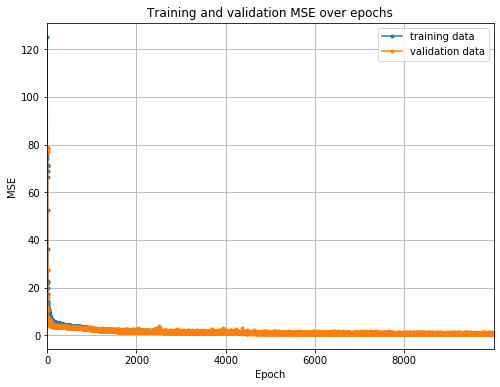

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['loss', 'val_loss'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.set_title('Training and validation MSE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MSE over epochs')

- Plot the changes of **MAPE** in **training** and **validation datasets** over epochs

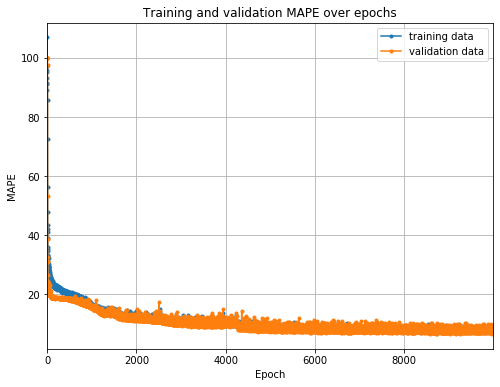

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
result.plot(y=['mape', 'val_mape'], marker='.', ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAPE')
ax.set_title('Training and validation MAPE over epochs')
ax.legend(['training data', 'validation data'])
ax.grid()
fig.savefig('Training and validation MAPE over epochs')

### 3.4. Prediction and Evaluation

In [17]:
# Use model.predict() to predict demand values for test dataset
model.predict(x_test)

array([[ 9.874369 ],
       [ 8.419006 ],
       [ 8.669949 ],
       [ 7.8352127],
       [10.526576 ],
       [ 9.006544 ],
       [ 8.231825 ],
       [ 9.2653885],
       [10.362486 ],
       [ 8.227631 ],
       [ 7.6388836],
       [ 8.140646 ],
       [ 9.361118 ],
       [ 8.298016 ],
       [ 6.1912403],
       [10.994631 ],
       [10.399965 ],
       [ 9.119036 ],
       [11.0993395],
       [ 8.8691025],
       [10.187817 ],
       [ 6.3767595],
       [10.156623 ],
       [ 6.6925716],
       [ 5.8403616],
       [10.081677 ],
       [ 7.9648595],
       [ 8.292805 ],
       [ 9.556104 ],
       [11.522207 ],
       [ 8.991112 ],
       [ 7.8352127],
       [ 9.316581 ],
       [ 6.497455 ],
       [ 6.623436 ],
       [ 8.064764 ],
       [ 7.2372174],
       [10.210981 ],
       [ 8.263919 ],
       [ 5.8500133],
       [ 9.890912 ],
       [ 8.9137745],
       [10.321463 ],
       [ 8.745793 ],
       [10.170381 ],
       [ 9.245638 ],
       [ 6.0972657],
       [10.41

In [18]:
model.evaluate(x_test, y_test)

190/190 [==============================] - 0s 42us/sample - loss: 0.7539 - mape: 6.9876


[0.753877383784244, 6.987643]

In [19]:
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
train_mape = model.evaluate(x_train, y_train, verbose=0)[1]
#train_mse = model.evaluate(x_train, y_train, verbose=0)[2]
print('training loss (MSE):', train_loss, '\ntraining MAPE:', train_mape, '%\n')
#print('training MSE (custom):', train_mse, '\n')

val_loss = model.evaluate(x_val, y_val, verbose=0)[0]
val_mape = model.evaluate(x_val, y_val, verbose=0)[1]
#val_mse = model.evaluate(x_val, y_val, verbose=0)[2]
print('validation loss (MSE):', val_loss, '\nvalidation MAPE:', val_mape, '%\n')
#print('validation MSE (custom):', val_mse, '\n')

test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mape = model.evaluate(x_test, y_test, verbose=0)[1]
#test_mse = model.evaluate(x_test, y_test, verbose=0)[2]
print('test loss (MSE):', test_loss, '\ntest MAPE:', test_mape, '%')
#print('test MSE (custom):', test_mse, '\n')

training loss (MSE): 0.6152927646509433 
training MAPE: 6.9032164 %

validation loss (MSE): 0.7876396660219159 
validation MAPE: 7.9991755 %

test loss (MSE): 0.753877383784244 
test MAPE: 6.987643 %


### 3.5. Saving the Yield Prediction model

In [20]:
model.save('G6_yield_prediction_model.h5')